# 理解Webpack

## 作用

-  首先明确一些概念：
    1. 服务器JS
        - 从Web前端开发来说，后台访问的资源最终都输出到浏览器，这些资源的格式浏览器可能无法访问。
    2. 浏览器JS
        - 传统的HTML，CSS，Javascript，静态资源；


- WebPack的作用
    - Webpack 是一个前端资源加载/打包工具。它将根据模块的依赖关系进行静态分析，然后将这些模块按照指定的规则生成对应的静态资源。
        - js
        - css
        - less等；
    - 静态资源就是浏览器可以运行、使用的资源；

## 安装

- 安装指令
    - `npm install webpack -g`
    - `cnpm install webpack -g` ：采用国内阿里的镜像站点，安装速度会快点。与npm本质完全一样；

>**备注：**如果用root账户进行npm install，应该使用`npm install  --unsafe-perm`，因为npm安装为了安全缘故，会自动切换到nobody用户。

- 安装截图：
    - 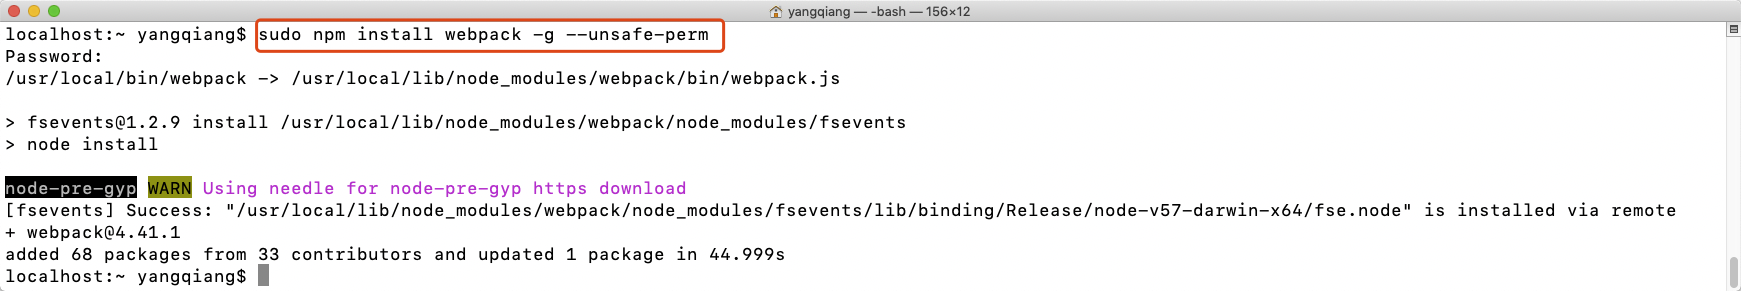

- webpack工具
     - 安装完毕会拥有一个webpack工具，用来对资源打包；
     - 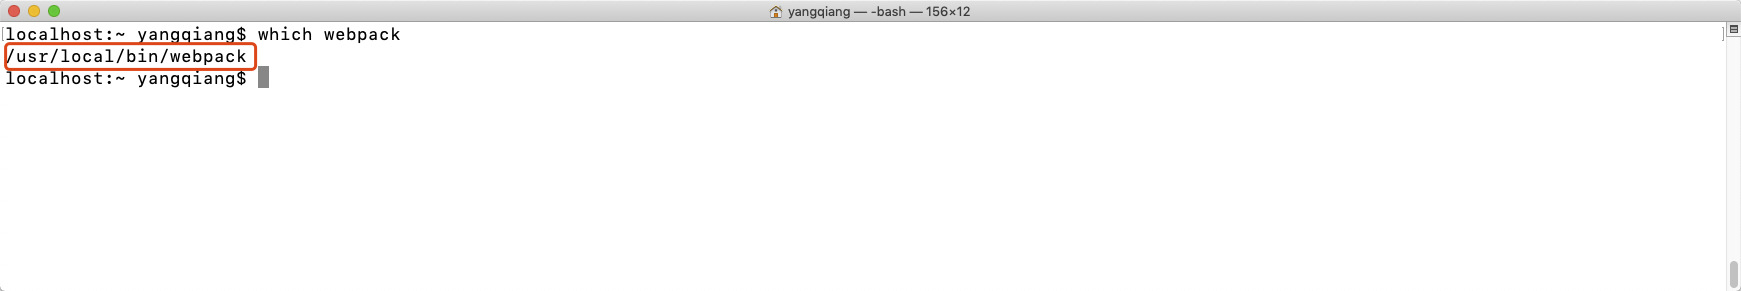

- 注意：
    - 一般webpack会推荐webpack-cli安装；

# 在浏览器中调用js

## 问题

1. 模块与模块调用脚本
    - 混合了node的语法，又使用了浏览器document对象，这是一个矛盾，webpack可以翻译，使得node（ES6）的语法翻译成在浏览器可以支持的js语法。
    - 注意：不能调用服务器的模块，比如path，net等，这些没有办法翻译。

```javascript
    // 文件名：p01_webpack_01module.js
    module.exports = {
        v_a: 88
    }

```

```javascript
    // 文件名：p01_webpack_02nodejs.js
    var mod = require('./p01_webpack_01module.js');
    // 客户端（浏览器）输出
    document.write("模块调用结果：<b>" + mod.v_a + "</b>");

    // 下面是服务器（node执行环境）运行输出（浏览器也支持）
    console.log(mod.v_a);

```

2. 浏览器html代码

```HTML
   <!-- 文件名：p01_webpack_03brower.html-->
    <!DOCTYPE html>
    <html>
        <head>
            <title>
                Webpack后的js调用
            </title>
            <meta charset="utf-8">
            <link rel="shortcut icon" href="#" />
        </head>
        <body>
            <!--因为js脚本包含支持node的require语法，所以下面的直接调用是存在问题的-->
            <script src="./p01_webpack_02nodejs.js"></script>
        </body>
    </html>
```

- 在浏览器执行代码，产生错误，无法识别require语法。
    - 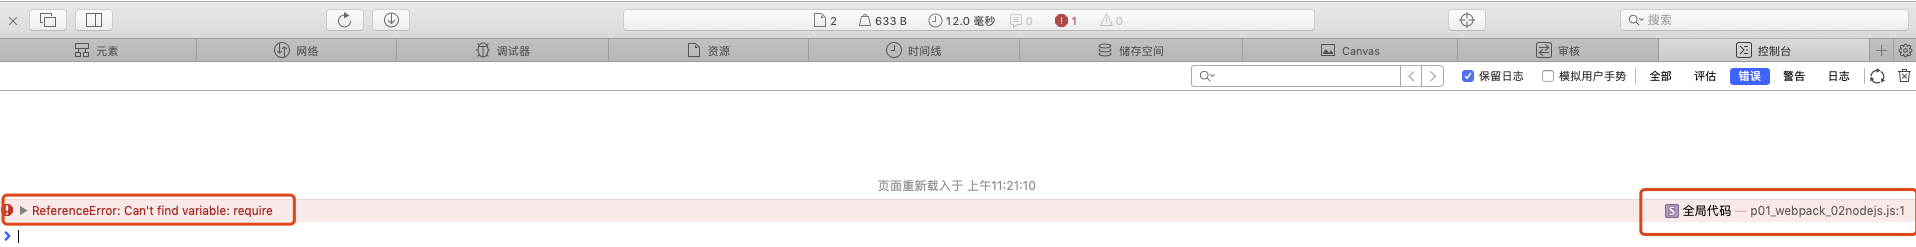

## webpack使用模式

### 使用webpack对使用node.js与ES6语法的脚本打包

- 命令：
    - `webpack   -o 输出的浏览器运行的js脚本   原始使用node.js与ES6语法编写的js脚本  `
    - 其他选项：使用`webpack --help`查看

- 执行命令：`webpack --mode development   --output p02_webpack_01browserjs.js   p01_webpack_02nodejs.js`
    - 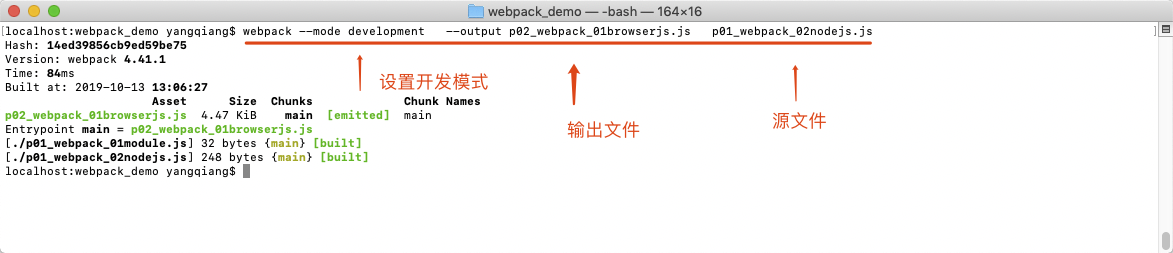

### 翻译后的js文件

```javascript

    /******/ (function(modules) { // webpackBootstrap
    /******/ 	// The module cache
    /******/ 	var installedModules = {};
    /******/
    /******/ 	// The require function
    /******/ 	function __webpack_require__(moduleId) {
    /******/
    /******/ 		// Check if module is in cache
    /******/ 		if(installedModules[moduleId]) {
    /******/ 			return installedModules[moduleId].exports;
    /******/ 		}
    /******/ 		// Create a new module (and put it into the cache)
    /******/ 		var module = installedModules[moduleId] = {
    /******/ 			i: moduleId,
    /******/ 			l: false,
    /******/ 			exports: {}
    /******/ 		};
    /******/
    /******/ 		// Execute the module function
    /******/ 		modules[moduleId].call(module.exports, module, module.exports, __webpack_require__);
    /******/
    /******/ 		// Flag the module as loaded
    /******/ 		module.l = true;
    /******/
    /******/ 		// Return the exports of the module
    /******/ 		return module.exports;
    /******/ 	}
    /******/
    /******/
    /******/ 	// expose the modules object (__webpack_modules__)
    /******/ 	__webpack_require__.m = modules;
    /******/
    /******/ 	// expose the module cache
    /******/ 	__webpack_require__.c = installedModules;
    /******/
    /******/ 	// define getter function for harmony exports
    /******/ 	__webpack_require__.d = function(exports, name, getter) {
    /******/ 		if(!__webpack_require__.o(exports, name)) {
    /******/ 			Object.defineProperty(exports, name, { enumerable: true, get: getter });
    /******/ 		}
    /******/ 	};
    /******/
    /******/ 	// define __esModule on exports
    /******/ 	__webpack_require__.r = function(exports) {
    /******/ 		if(typeof Symbol !== 'undefined' && Symbol.toStringTag) {
    /******/ 			Object.defineProperty(exports, Symbol.toStringTag, { value: 'Module' });
    /******/ 		}
    /******/ 		Object.defineProperty(exports, '__esModule', { value: true });
    /******/ 	};
    /******/
    /******/ 	// create a fake namespace object
    /******/ 	// mode & 1: value is a module id, require it
    /******/ 	// mode & 2: merge all properties of value into the ns
    /******/ 	// mode & 4: return value when already ns object
    /******/ 	// mode & 8|1: behave like require
    /******/ 	__webpack_require__.t = function(value, mode) {
    /******/ 		if(mode & 1) value = __webpack_require__(value);
    /******/ 		if(mode & 8) return value;
    /******/ 		if((mode & 4) && typeof value === 'object' && value && value.__esModule) return value;
    /******/ 		var ns = Object.create(null);
    /******/ 		__webpack_require__.r(ns);
    /******/ 		Object.defineProperty(ns, 'default', { enumerable: true, value: value });
    /******/ 		if(mode & 2 && typeof value != 'string') for(var key in value) __webpack_require__.d(ns, key, function(key) { return value[key]; }.bind(null, key));
    /******/ 		return ns;
    /******/ 	};
    /******/
    /******/ 	// getDefaultExport function for compatibility with non-harmony modules
    /******/ 	__webpack_require__.n = function(module) {
    /******/ 		var getter = module && module.__esModule ?
    /******/ 			function getDefault() { return module['default']; } :
    /******/ 			function getModuleExports() { return module; };
    /******/ 		__webpack_require__.d(getter, 'a', getter);
    /******/ 		return getter;
    /******/ 	};
    /******/
    /******/ 	// Object.prototype.hasOwnProperty.call
    /******/ 	__webpack_require__.o = function(object, property) { return Object.prototype.hasOwnProperty.call(object, property); };
    /******/
    /******/ 	// __webpack_public_path__
    /******/ 	__webpack_require__.p = "";
    /******/
    /******/
    /******/ 	// Load entry module and return exports
    /******/ 	return __webpack_require__(__webpack_require__.s = "./p01_webpack_02nodejs.js");
    /******/ })
    /************************************************************************/
    /******/ ({

    /***/ "./p01_webpack_01module.js":
    /*!*********************************!*\
      !*** ./p01_webpack_01module.js ***!
      \*********************************/
    /*! no static exports found */
    /***/ (function(module, exports) {

    eval("module.exports = {\n    v_a: 88\n}\n\n//# sourceURL=webpack:///./p01_webpack_01module.js?");

    /***/ }),

    /***/ "./p01_webpack_02nodejs.js":
    /*!*********************************!*\
      !*** ./p01_webpack_02nodejs.js ***!
      \*********************************/
    /*! no static exports found */
    /***/ (function(module, exports, __webpack_require__) {

    eval("var mod = __webpack_require__(/*! ./p01_webpack_01module.js */ \"./p01_webpack_01module.js\");\n// 客户端（浏览器）输出\ndocument.write(\"模块调用结果：<b>\" + mod.v_a + \"</b>\");\n\n// 下面是服务器（node执行环境）运行输出（浏览器也支持）\nconsole.log(mod.v_a);\n\n\n//# sourceURL=webpack:///./p01_webpack_02nodejs.js?");

    /***/ })

    /******/ });

```

### 在HTML中调用

```HTML

    <!DOCTYPE html>
    <html>
        <head>
            <title>
                Webpack后的js调用
            </title>
            <meta charset="utf-8">
            <link rel="shortcut icon" href="#" />
        </head>
        <body>
            <!--因为js脚本包含支持node的require语法，所以下面的直接调用是存在问题的-->
            <script src="./p02_webpack_01browserjs.js"></script>
        </body>
    </html>


```

- 使用浏览器访问结果
    - 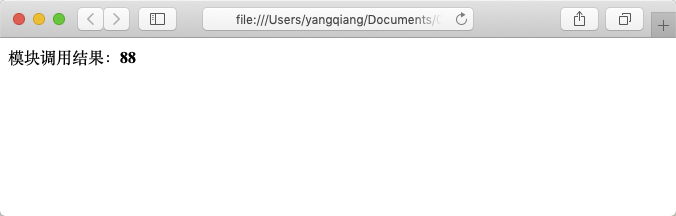

# 从webpack衍生的设计模式

## 使用require加载样式表

- 从此原来的样式表也可以这么玩，使用require来加载样式表模块，样式表有三种方式：
    - 标记中使用style属性；
    - 使用style标记；
    - 使用独立的文件；(使用link引入)

- 除第一种情况，后面两种情况被如下两个模块实现：
    - style-loader
    - css-oader

## 安装css-loader与style-loader

- 安装指令：`sudo npm install css-loader style-loader -g --unsafe-perm`
    - 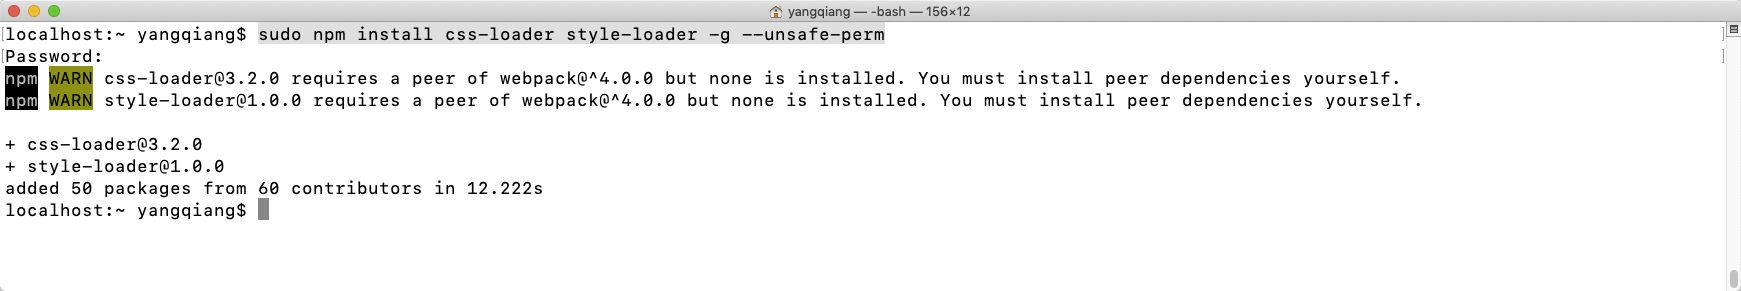

## 使用css-loader与style-loader

### 样式表代码

```CSS
    body{
        background-color: red;
    }
    div.mycss{
        width: 200px;
        height: 100px;
        background-color: yellow;
    }

```

### 引入样式表

- 直接使用require或者import

```javascript

    require('./p03_webpack_01css.css');
    // 客户端（浏览器）输出
    document.write("<div class='mycss'>样式编译</div>");

```

### 使用webpack打包指定样式器

- 命令：
    - `webpack  --mode development --module-bind 'css=style-loader!css-loader' --output p03_webpack_03browserjs.js  p03_webpack_02js.js`
    - 多个laoder之间使用`!`分隔；
    - 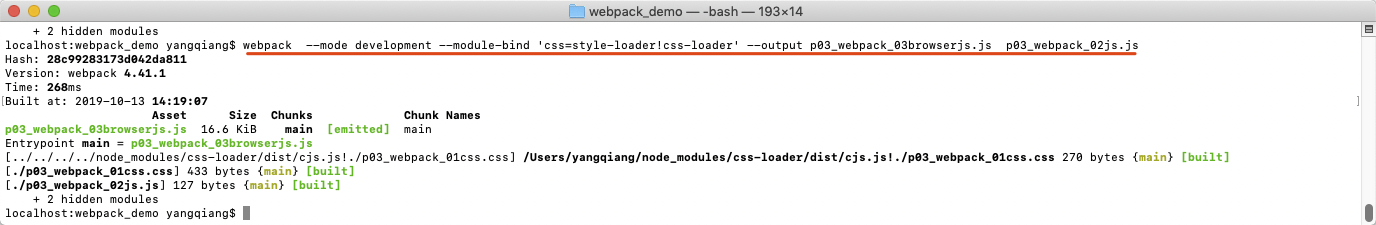

### 使用打包后的js文件

```HTML

    <!DOCTYPE html>
    <html>
        <head>
            <title>
                Webpack后的js调用
            </title>
            <meta charset="utf-8">
            <link rel="shortcut icon" href="#" />
        </head>
        <body>
            <!--因为js脚本包含支持node的require语法，所以下面的直接调用是存在问题的-->
            <script src="./p03_webpack_03browserjs.js"></script>
        </body>
    </html>


```

## import的使用

- webpack的翻译支持require/module.exports与import/export

- 在js脚本中可以使用import引入css

```javascript
import './p03_webpack_01css.css';
// 客户端（浏览器）输出
document.write("<div class='mycss'>样式编译</div>");
```

## webpack的帮助

- webpack的加载器的使用有三种方式，这类选择个人喜欢的方式。
    - 在代码中指定加载器
        - `require("!style-loader!css-loader!./style.css");`
    - 在命令行中指定加载器
    - 配置webpack的配置文件指定加载器
        - 这个后面webpack的项目开发中慢慢用。
    

----